<div style="float:right;border-left:1em solid transparent">
    <i>Notebooks on Programming</i>
</div>

---
# On Algorithms - Draft
**[Emil Sekerinski](http://www.cas.mcmaster.ca/~emil), McMaster University, November 2024**

---

<figure style="float:right" >
    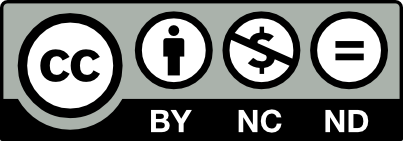
    <figcaption style="width:13em;font-size:80%"><a href="https://creativecommons.org/licenses/by-nc-nd/4.0/">Licensed under Creative Commons CC BY-NC-ND</a>
    </figcaption>
</figure>

## Elements of Algorithms

An *algorithm* specifies a sequence of *instructions* or *commands* to be executed by a *machine* that leads to the desired outcome:
- A washing machine follows an algorithm for the sequence of washing and rinsing cycles, which depends on the selected program and sensors. The instructions of that machine are taking water in, letting water out, applying detergent, rotating the drum, and heating the water.
- A traffic light follows an algorithm for switching the light. The instructions of a traffic light are turning individual lights on and off.
- Driving directions are an algorithm to be executed by a human. The instructions are driving to the next stop, continuing straight ahead, and turning left and right.
- A cookbook recipe is an algorithm also to be executed by a human. Instructions are putting ingredients in a pot, stirring the soup for a minute, waiting five minutes, and turning the heat on and off.

The *computation* prescribed by an algorithm goes through a sequence of *states*. Each command transitions from a source state to a destination state. A command may have a *guard*. The visual notation and the example of a garage door are:

<img style="float:left;border-left:6em solid transparent" src="./img/Transition.svg"/>
<img style="float:right;border-left:6em solid transparent" src="./img/GarageDoor.svg"/>

Algorithms that are *hierarchically structured* as follows have a *textual representation*. Suppose `S` and `T` are instructions that themselves may be structured. Their _sequential_ composition first executes `S` and then `T`:

<div style="float:left;border-left:6em solid transparent">

```
S ; T
```

</div>
<img style="float:left;border-left:6em solid transparent" src="./img/Sequential.svg"/>
<img style="float:right;border-left:6em solid transparent" src="./img/WashDry.svg"/>

We say that `S` leads from a state in which `P` holds to a state in which `Q` holds, and `T` leads to a state in which `R` holds. The example illustrates doing laundry.

The _conditional_ composition makes the next command dependent on guards. Suppose `S` and `T` are instructions that themselves may be structured:

<div style="float:left;border-left:6em solid transparent">

```
if B → S ⫿ C → T
```

</div>
<img style="float:left;border-left:6em solid transparent" src="./img/If2.svg"/>
<img style="float:right;border-left:6em solid transparent" src="./img/PastaPizza.svg"/>

From `P`, if `B` holds, `S` leads to `Q`, and if `C` holds, `T` leads to `Q`. If both `B` and `C` hold, the choice is arbitrary or *nondeterministic*. If neither holds, no transition is possible. The example illustrates taking a meal at home: if we have both pasta and pizza in stock, we will get full, no matter the choice. If neither is in stock, we remain hungry!

The _repetitive_ composition executes the *body*, a command, as long as the guard is true. If the guard is false, the repetition terminates. The example illustrates a morning procedure:

<div style="float:left;border-left:2em solid transparent">

```algorithm
do B → S
```

</div>
<img style="float:left;border-left:6em solid transparent" src="./img/Do1.svg"/>
<img style="float:right;border-left:6em solid transparent" src="./img/Morning.svg"/>

The repetitive composition can take several *alternatives*. For two alternatives, the notation is:

<div style="float:left;border-left:2em solid transparent">

```algorithm
do B → S ⫿ C → T
```

</div>
<img style="float:left;border-left:6em solid transparent" src="./img/Do2.svg"/>
<img style="float:right;border-left:6em solid transparent" src="./img/Buffet.svg"/>

From `P`, if `B` holds, `S` leads to `P` again, and if `C` holds, `T` leads to `P`. If both `B` and `C` hold, the choice is nondeterministic. If neither holds, the repetition terminates. The example illustrates having dinner at a buffet.

The *state space* of an algorithm is partitioned into *variables*. For example, the amount in differnt jars can be represented by a variable for each jar.

The notation `x := E` *assigns* the current value of `E` to variable `x`. For example, `m` is set to the maximum of `x` and `y` by:

<div style="float:left;border-left:2em solid transparent">

```algorithm
if x ≤ y → m := y
 ⫿ x ≥ y → m := x
```

</div>
<img style="float:left;border-left:6em solid transparent" src="./img/Max.svg"/>

The *multiple assignment* `x, y := E, F` assigns simultaneously `E` to `x` and `F` to `y`. For example, numbers `x, y, z` are sorted by:

<div style="float:left;border-left:2em solid transparent">

```algorithm
do y ≤ x → x, y := y, x
 ⫿   z ≤ y → y, z := z, y
```

</div>
<img style="float:left;border-left:6em solid transparent" src="./img/Sort3.svg"/>

The assignment `x, y := y, z` swaps the values of `x` and `y`. While the execution is nondeterministic - in case `x, y, z` are `5, 4, 3`, either `x` and `y` or `y` and `z` will be swapped first - the result is *uniquely determined*.

Simple and composed commands always have a _single entry_ and _single exit_. The shades below in Euclid's algorithm illustrate the _hierarchical composition_ of commands. The algorithm computes the greatest common divisor of natural numbers `x` and `y` by repeatedly subtracting the smaller from the larger one until they are the same. On termination, they are the greatest common divisor of the original two numbers.

<div style="float:left;border-left:2em solid transparent">

```algorithm
a, b := x, y
do a ≠ b →
    if a > b → a := a – b
     ⫿ a < b → b := b – a
```

</div>
<img style="float:left;border-left:6em solid transparent" src="./img/EuclidShades.svg"/>

The guards of the inner conditional command don't cover the case when `a = b`. Doing so would be an *overspecification*, as this case cannot occur. The *initialization* `a, b := x, y` can also be achieved by either `a := x ; b := y` or `b := y ; a := x`. As the order does not matter, the multiple assignment is more abstract.

The algorithm can be expressed  more compactly by a repetitive command with two alternatives:

<div style="float:left;border-left:2em solid transparent">

```algorithm
a, b := x, y
do a > b → a := a – b
 ⫿   a < b → b := b – a
```

</div>
<img style="float:left;border-left:6em solid transparent" src="./img/EuclidDo2.svg"/>

The state diagram is *fully annotated* with the conditions that hold in each state. The annotation is essential for checking the correctness of the algorithm, to which we will return.

Commands can be composed to form more complex commands. For multi-line commands, indentation is used to avoid explicit parenthesis and the `;` operator is left out at the end of lines. The following commands are the same:

```algorithm
do B →                   do B → (S ; T)
    S
    T

do B →                   do B → (if C → S ⫿ D → T)
    if C →
        S
     ⫿ D →
        T
```

The `skip` command transitions from its initial state to its final state without doing anything:

<div style="float:left;border-left:6em solid transparent">

```
skip
```

</div>
<img style="float:left;border-left:6em solid transparent" src="./img/CorrectnessSkip.svg"/>


The `stop` command does not transition from its initial state at all. It describes a computation that is stuck. In state diagrams,  it is "drawn" by no outgoing transition:

<div style="float:left;border-left:6em solid transparent">

```
skip
```

</div>
<img style="float:left;border-left:6em solid transparent" src="./img/CorrectnessStop.svg"/>


## Loop Invariants

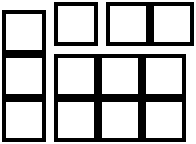

Consider breaking a rectangular chocolate bar with `m × n` squares into individual squares. Each horizontal or vertical cut breaks one piece into two. The picture to the right shows a `3 × 4` bar after three cuts. How many cuts are needed to completely cut the bar into individual squares? What is the best way to do so?


The first step is to introduce variables for the relevant quantities of the problem.
- As we are interested in the number of cuts, let `c` stand for the number of cuts so far, with an initial value of `0`.
- The algorithm ends when we have `m × n` pieces, so let `p` stand for the current number of pieces, which is initially `1`.
- In each step, we cut a piece, which means `c` is incremented by 1. How does this affect `p`? Cutting any piece gives two pieces, which means `p` is incremented by 1 as well.

<img style="float:right;border-left:6em solid transparent" src="./img/ChocolateBar.svg"/>

With the initial condition, this means that `c = p – 1` is an *invariant* of the repetitive command, also called a *loop invariant*. As `p` is `m × n` finally, we know that `c` must be `m × n – 1` finally. This is independent of the order in which we cut the pieces! The annotated algorithm is to the right. The equivalent textual representation is:

```
p, c := 1, 0
do p < m × n →
    p, c := p + 1, c + 1
```

The key here was not to represent the shapes of the pieces in intermediate states. This would have made the solution only more complicated.

## Hierarchical Diagrams

Nesting allows an annotation repeated in several states to be factored into a _superstate_. The following are equivalent diagrams:

<img style="float:left;border-left:2em solid transparent" src="./img/NestedDiagram.svg"/>

As long as the computation resides within the superstate, `R` is an *invariant*. For example, the algorithm for multiplication by shifting is:

```algorithm
z, u, v := 0, x, y
do u ≠ 0 →
    if odd(u) → z := z + v
     ⫿ even(u) → skip
    u, v := u div 2, 2 × v

```

The following  two diagrams are equivalent. The one to the right factors out `u > 0` to a superstate:

<img style="float:left;border-left:2em solid transparent" src="./img/MultiplyByShiftCombined.svg"/>

## Global Invariants

A farmer needs to bring a wolf, a goat, and a cabbage across the river. The boat is tiny and can carry only one of them at a time. If he leaves the wolf and the goat alone together, the wolf will eat the goat. If he leaves the goat and the cabbage alone together, the goat will eat the cabbage. How can he bring all three safely across the river?

To represent the problem, we observe that there are four individuals, the farmer, the wolf, the goat, and the cabbage, that change positions: they are either on the left bank, in the boat, or on the right bank. In the boat, the goat and cabbage are safe, as the farmer is with them, so the only critical positions are the two sides of the river, which we call the left and right banks. Thus we introduce variables `f`, `w`, `g`, `c` –for the farmer, wolf, goat, cabbage– with values `L`, `R` –for the left and right bank. Initially, all of `f`, `w`, `g`, `c` are `L`, and finally, they should be `R`. The constraint that the wolf must not be left with the goat alone is expressed by:

```
f = g = w ∨ g ≠ w
```

The constraint that goat and cabbage must not be left alone is expressed by:

```
f = g = c ∨ g ≠ c
```

These constraints have to hold during the computation at all states. Such a restriction is called a *global invariant*. Unlike a loop invariant, which has to hold only at the beginning and end of a loop, a global invariant must always hold.

<figure style="width:10em;float:right;border-left:1em solid transparent">

| f | g | c | w |
|---|---|---|---|
| L | L | L | L |
| L | L | L | R |
| L | L | R | L |
| L | L | R | R |
| L | R | L | L |
| R | L | R | R |
| R | R | L | L |
| R | R | L | R |
| R | R | R | L |
| R | R | R | R |

</figure>

With four variables and two possible values for each, there are 2⁴ = 16 possible states. Let us enumerate all states that satisfy the global invariants. Such an enumeration is called a state exploration. The resulting ten distinct states are shown to the right. The initial state is `LLLL` and the final state is `RRRR`. From `LLLL`, the next possible state is only `RRLL`, which means that the farmer takes the goat from the left bank to the right bank. Then the farmer needs to return to the left bank, so the next state is `LRLL`. From that state, there are two possible next states, `RRRL` and `RRLR`. The diagram below completes these state transitions until the final state `RRRR`. Thus, there are two possible solutions to the problem.

<img style="float:left" src="./img/WolfGoatCabbage.svg" />

A recommended step in problem-solving is to review the obtained solution critically and, with the gained insight, question if a better one is possible. We note that the goat is in conflict with both the wolf and the cabbage, but the wolf and cabbage are similar in the sense that neither one can be together with the goat alone. That is, for our purposes, wolf and cabbage are identical! 

Hence, we can reformulate the problem more abstractly: the farmer has to move two A's (the wolf and the cabbage) and one B (the goat) from the left bank to the right bank, such that an A and the B cannot be on the same bank without the farmer. A solution is now easier to arrive at: the farmer first hast to take the B, return empty, take an A, return with B, take the other A, return empty, and finally take the B. This more abstract formulation has only one solution, albeit one that contains the statement "take an A", which allows an arbitrary choice among the two A's. What makes the symmetry between the wolf and cabbage difficult to see is the asymmetry of the roles of wolf and goat in "the wolf will eat the goat" and likewise of goat and cabbage in "the goat will eat the cabbage".

## Correctness

We are interested in which final state is produced for which initial state. For example:

<div style="float:left;border-left:2em solid transparent">

if initially  
then after  
finally
</div>
<div style="float:left;border-left:2em solid transparent">

`x = 3`  
`x := x + 1`   
`x = 4`
</div>

<img style="float:left;border-left:6em solid transparent" src="./img/Correctness1.svg"/>

Let us consider the final states for a _set_ of possible initial states. The initial and final states are characterized by _predicates_ (Boolean expressions). For example:

<div style="float:left;border-left:2em solid transparent">

if initially  
then after  
finally
</div>
<div style="float:left;border-left:2em solid transparent">

`x ≥ y`  
`x := x + 1`  
`x ≥ y + 1`

</div>

<img style="float:left;border-left:6em solid transparent" src="./img/Correctness2.svg"/>

In general, for predicates `P` and `Q`, we express that under _precondition_ `P` command `S` establishes _postcondition_ `Q` by the _correctness assertion_ (colour distinguishes programs from properties):

<div style="float:left;border-left:2em solid transparent">

```
{P}  S  {Q}
```

</div>
<img style="float:left;border-left:6em solid transparent" src="./img/CorrectnessAssertion.svg"/>

The correctness of an algorithm expressed as an annotated state diagram is checked by the following rules:

<div style="float:left;border-left:2em solid transparent">

if `P ∧ B ⇒ Q` then

</div>
<img style="float:left;border-left:6em solid transparent" src="./img/GuardTransition.svg"/>

<div style="float:left;border-left:2em solid transparent">

if `P ⇒ Q[x, y := E, F]` then

</div>
<img style="float:left;border-left:6em solid transparent" src="./img/AssignmentTransition.svg"/>

<div style="float:left;border-left:2em solid transparent">

if `P ∧ B ⇒ Q[x, y := E, F]` then

</div>
<img style="float:left;border-left:6em solid transparent" src="./img/GuardAssignmentTransition.svg"/>

Here, `P[x, y := E, F]` stands for the _simultaneous substitution_ of `x` with `E` and `y` with `F`. An algorithm is correct if all its transitions are correct.

The last rule is the most general one: by specializing the multiple assignments to "assign to no variables", the first rule emerges as a special case. The second rule emerges by specializing `B` to be `true`.

Assuming `x`, `y`, `z` are integer variables, consider:

<div style="float:left;border-left:2em solid transparent">

```algorithm
{x + y = 10}  z := x + y  {z = 10}
```

</div>
<img style="float:left;border-left:6em solid transparent" src="./img/Correctness3.svg"/>

The assignment is correct with respect to the annotation provided if:
```algorithm
x + y = 10 ⇒ (z = 10)[z := x + y]
```
Here is the proof using [equational logic](https://en.wikipedia.org/wiki/Equational_logic), with justifications between the steps:
```algorithm
    x + y = 10 ⇒ (z = 10)[z := x + y]
≡        {by substitution}
    x + y = 10 ⇒ x + y = 10
≡        {reflexivity of ⇒}
    true
```

*Question:* If the precondition and statement are fixed, what else are possible postconditions?

_Answer:_
- `true` (which does not say anything about the state)
- `z = 10 ∧ x + y = 10` (as `x`, `y` do not change)

In general, if `P` is a Boolean-valued function, the following holds for arbitrary variable `x` and expression `E`:

<div style="float:left;border-left:2em solid transparent">

```algorithm
{P(E)}  x := E  {P(x)}
```

</div>
<img style="float:left;border-left:6em solid transparent" src="./img/Correctness4.svg"/>

The correctness follows immediately from the rule for assignments.

Assuming `a`, `u`, `y`, `z` are integer variables, the following annotated statement is correct:

<div style="float:left;border-left:2em solid transparent">

```algorithm
{z + u × y = a ∧ u > 0}
z, u := z + y, u – 1
{z + u × y = a ∧ u ≥ 0}
```

</div>
<img style="float:left;border-left:6em solid transparent" src="./img/Correctness5.svg"/>

Here is the proof; simple steps are justified by "arithmetic" and "logic":

```algorithm
    z + u × y = a ∧ u > 0 ⇒
          (z + u × y = a ∧ u ≥ 0)[z, u := z + y, u – 1]
≡        {by substitution, leaving out parenthesis}
    z + u × y = a ∧ u > 0 ⇒  z + y + (u – 1) × y = a ∧ u – 1 ≥ 0
≡        {distrbutivity of × over –; E – 1 ≥ F ≡ E > F for any E, F}
    z + u × y = a ∧ u > 0 ⇒  z + y + u × y – y = a ∧ u > 0
≡        {arithmetic}
    z + u × y = a ∧ u > 0 ⇒  z + u × y = a ∧ u > 0
≡        {logic}
    true
```

The following example involves the sequential composition of statements. Suppose that `x`, `y` are program variables and `A`, `B` *ghost* (or *logical* variables) – variables that appear in annotations but not statements. The following program exchanges the values of `x` and `y` without using an auxiliary variable:

<div style="float:left;border-left:2em solid transparent">

```algorithm
{x = A ∧ y = B}
x := x + y
{x – y = A ∧ y = B}
y := x – y
{y = A ∧ x – y = B}
x := x – y
{y = A ∧ x = B}
```

</div>
<img style="float:left;border-left:6em solid transparent" src="./img/Swap.svg"/>

The correctness of the three assignments follows from the corresponding conditions:

- `x = A ∧ y = B ⇒ (x – y = A ∧ y = B)[x := x + y]`
- `x – y = A ∧ y = B ⇒ (y = A ∧ x – y = B)[y := x – y]`
- `y = A ∧ x – y = B ⇒ (y = A ∧ x = B)[x := x – y]`

The maximum of two numbers is defined as:
```algorithm
m = max(x, y)   ≡   x ≤ m ∧ y ≤ m ∧ (m = x ∨ m = y)
```
Determining the maximum of two numbers involves a conditional statement:

<div style="float:left;border-left:2em solid transparent">

```algorithm
{true}
if x < y then
    m := y
else
    m := x
{m = max(x, y)}
```

</div>
<img style="float:left;border-left:6em solid transparent" src="./img/Max.svg"/>

The correctness follows from the following conditions:

- `x < y ⇒ (m = max(x, y))[m := y]` 
- `x ≥ y ⇒ (m = max(x, y))[m := x]`

To prove the first implication, rather than reducing it to `true`, we show that the left-hand side is a consequence of the right-hand side:

```algorithm
    (m = max(x, y))[m := y]
≡        {by substitution, leaving out parenthesis}
    y = max(x, y)
≡        {definition of max}
    x ≤ y ∧ y ≤ y ∧ (y = x ∨ y = y)
≡        {reflexivity of ≤, =}
    x ≤ y ∧ true
≡        {simplification}
    x ≤ y
⇐        {E < F ⇒ E ≤ F for any E, F}
    x < y
```

Annotations of `true` in programs and state diagrams will be left out.

*Aside.* Flowcharts are different from state diagrams; in flowcharts, statements are attached to nodes rather than to vertices:

<img style="float:left;border-left:2em solid transparent" src="./img/MaxFlowchart.svg"/>

We continue with state diagrams as they are more suitable for reasoning about correctness, particularly of concurrent programs.

The next program computes the product of integer variables `x` and `y` by successive additions:

<div style="float:left;border-left:2em solid transparent">

```algorithm
{x ≥ 0}
z, u := 0, x
{z + u × y = x × y ∧ u ≥ 0}
while u > 0 do
    z, u := z + y, u – 1
{z = x × y}
```

</div>
<img style="float:left;border-left:6em solid transparent" src="./img/Multiply.svg"/>

The correctness follows from the following conditions:

- `x ≥ 0 ⇒ (z + u × y = x × y ∧ u ≥ 0)[z, u := 0, x]`
- `u > 0 ∧ z + u × y = x × y ∧ u ≥ 0 ⇒` <br>
  &nbsp;&nbsp;&nbsp;&nbsp;  `(z + u × y = x × y ∧ u ≥ 0)[z, u := z + y, u – 1]`
- `u ≤ 0 ∧ z + u × y = x × y ∧ u ≥ 0 ⇒`<br>
  &nbsp;&nbsp;&nbsp;&nbsp; `z = x × y`

The intermediate annotation above is a *loop invariant*: it captures the design decision behind the loop, namely how `z` approximates the product.

Loop invariants are analogous to induction hypothesis: a loop invariant has to hold at the entry of the loop (induction base), and assuming that the loop invariant holds at the beginning of the body, it has to hold at the end (induction step).

For integers `x`, `y`, the greatest common divisor `gcd(x, y)` is integer `d` such that `d` divides `x` and `y` and any other divisor of `x` and `y` divides `d`. The following properties hold:

```algorithm
gcd(x, x) = x
gcd(x, y) = gcd(y, x)
gcd(x, y) = gcd(x – y, y)    if    x > y
```
The annotated algorithm using Euclid's method for the greatest common divisor is:

<div style="float:left;border-left:2em solid transparent">

```algorithm
{x > 0 ∧ y > 0}
a, b := x, y
{gcd(a, b) = gcd(x, y) ∧
 a > 0 ∧ b > 0}
while a ≠ b do
    if a > b then
        a := a – b
    else
        b := b – a
{a = gcd(x, y)}
```

</div>
<img style="float:left;border-left:6em solid transparent" src="./img/Euclid.svg"/>

The correctness follows from the following conditions:
- `x > 0 ∧ y > 0 ⇒ (gcd(a, b) = gcd(x, y) ∧ a > 0 ∧ b > 0)[a, b := x, y]`
- `gcd(a, b) = gcd(x, y) ∧ a > 0 ∧ b > 0 ⇒ gcd(a, b) = gcd(x, y) ∧ a > 0 ∧ b > 0 ∧ a ≠ b`
- `gcd(a, b) = gcd(x, y) ∧ a > 0 ∧ b > 0 ∧ a ≠ b ∧ a > b ⇒ (gcd(a, b) = gcd(x, y) ∧ a > 0 ∧ b > 0)[a := a – b]`
- `gcd(a, b) = gcd(x, y) ∧ a > 0 ∧ b > 0 ∧ a ≠ b ∧ a ≤ b ⇒ (gcd(a, b) = gcd(x, y) ∧ a > 0 ∧ b > 0)[b := b – a]`
- `gcd(a, b) = gcd(x, y) ∧ a > 0 ∧ b > 0 ⇒ a = gcd(x, y)`

The correctness rules can be equivalently expressed in textual form, which is more suitable for larger programs. There is one rule for each kind of statement:


**Rules for correctness of statements**

<div style="display:table; border-top:1em solid transparent">
  <div style = "display:table-cell; border-left:24px solid transparent; vertical-align:middle">
    <code>{P} x, y := E, F {Q}</code> <br><br>
    <code>{P} S ; T {R}</code> <br><br>
    <code>{P} if B then S else T {Q}</code> <br><br>
    <code>{P} if B then S {Q}</code> <br><br>
    <code>{P} while B do S {Q}</code> 
  </div>
  <div style = "display:table-cell; border-left:12px solid transparent; vertical-align:middle" >
    if &nbsp; <code>P ⇒ Q[x, y := E, F]</code> <br><br>
    if &nbsp; <code>{P} S {Q}</code> &nbsp; and &nbsp;<code>{Q} T {R}</code> <br><br>
    if &nbsp; <code>{P ∧ B} S {Q}</code> &nbsp; and &nbsp;<code>{P ∧ ¬B} T {Q}</code> <br><br>
    if &nbsp; <code>{P ∧ B} S {Q}</code> &nbsp; and &nbsp;<code>P ∧ ¬B ⇒ Q</code> <br><br>
    if &nbsp; <code>{P ∧ B} S {P}</code> &nbsp; and &nbsp;<code>P ∧ ¬B ⇒ Q</code>
  </div>
</div>

*Example (Integer Multiplication).* The program is repeated to the right. By the rule for sequential composition, correctness follows from:

<span style = "float:right;border-left:1em solid transparent">

```algorithm
{x ≥ 0}
z, u := 0, x
{z + u × y = x × y ∧ u ≥ 0}
while u > 0 do
    z, u := z + y, u – 1
{z = x × y}
```

</span>

<span style = "float:left;border-right:1em solid transparent">(1)</span>

```algorithm
{x ≥ 0}
z, u := 0, x
{z + u × y = x × y ∧ u ≥ 0}
```

<span style = "float:left;border-right:1em solid transparent">(2)</span>

```algorithm
{z + u × y = x × y ∧ u ≥ 0}
while u > 0 do
    z, u := z + y, u – 1
{z = x × y}
```

For (2), the rule of repetition leads to:

<span style = "float:left;border-right:1em solid transparent">(2.1)</span>

```algorithm
{z + u × y = x × y ∧ u ≥ 0 ∧ u > 0}
z, u := z + y, u – 1
{z + u × y = x × y ∧ u ≥ 0}
```

<span style = "float:left;border-right:1em solid transparent">(2.2)</span>

```algorithm
z + u × y = x × y ∧ u ≥ 0 ∧ u ≤ 0 ⇒ z = x × y
```

*Exercise.* Prove the conditions (1), (2.1), (2.2). For (1) and (2.1), first apply the rule for assignments!

For (1), the rule for assignments leads to:

```algorithm
x ≥ 0 ⇒ (z + u × y = x × y ∧ u ≥ 0)[z, u := 0, x]
```

This holds as:

```algorithm
    (z + u × y = x × y ∧ u ≥ 0)[z, u := 0, x]
≡        {by substitution, leaving out parenthesis}
    0 + x × y = x × y ∧ u ≥ 0
≡        {by arithmetic, logic}
    u ≥ 0
```

For (2.1), the rule for assignments leads to:

```algorithm
z + u × y = x × y ∧ u ≥ 0 ∧ u > 0 ⇒ (z + u × y = x × y ∧ u ≥ 0)[z, u := z + y, u – 1]
```

This holds as:

```algorithm
    (z + u × y = x × y ∧ u ≥ 0)[z, u := z + y, u – 1]
≡        {by substitution}
    (z + y) + (u – 1) × y = x × y ∧ u – 1 ≥ 0
≡        {by distribution, arithmetic}
    z + y + u × y – y = x × y ∧ u > 0
≡        {by arithmetic}
    z + u × y = x × y ∧ u > 0
≡        {by arithmetic}
    z + u × y = x × y ∧ u ≥ 0 ∧ u > 0
```

Condition (2.2) holds as:

```algorithm
    z + u × y = x × y ∧ u ≥ 0 ∧ u ≤ 0
≡        {by arithmetic}
    z + u × y = x × y ∧ u = 0
≡        {by substitution of equals for equals}
    z + 0 × y = x × y ∧ u = 0
≡        {arithmetic}
    z = x × y ∧ u = 0
⇒        {logic}
    z = x × y
```

*Example (Quotient and Remainder).*  For integers `x`, `y`, the quotient `x div y` (also written `x ÷ y`) and the remainder `x mod y` are defined for all `y > 0` by:

```algorithm
x div y = q      ≡     x = q × y + r  
x mod y = r           0 ≤ r < y
```

The following program determines `x div y` and `x mod y` by only using addition and subtraction:

```algorithm
{x ≥ 0 ∧ y > 0}
q, r := 0, x
{x = q × y + r ∧ r ≥ 0 ∧ y > 0}
while r ≥ y do
    q, r := q + 1, r – y
{q = x div y ∧ r = x mod y}
```


By the rule for sequential composition, the correctness follows from:

<span style = "float:left;border-right:1em solid transparent">(1)<br><br></span>

```algorithm
{x ≥ 0 ∧ y > 0}
q, r := 0, x
{x = q × y + r ∧ r ≥ 0 ∧ y > 0}
```

<span style = "float:left;border-right:1em solid transparent">(2)<br><br></span>

```algorithm
{x = q × y + r ∧ r ≥ 0 ∧ y > 0}
while r ≥ y do
    q, r := q + 1, r – y
{q = x div y ∧ r = x mod y}
```

For (2), applying the rule for repetitions leads to:

<span style = "float:left;border-right:1em solid transparent">(2.1)<br><br></span>

```algorithm
{r ≥ y ∧ x = q × y + r ∧ r ≥ 0 ∧ y > 0}
q, r := q + 1, r – y
{x = q × y + r ∧ r ≥ 0 ∧ y > 0}
```

<span style = "float:left;border-right:1em solid transparent">(2.2)<br></span>

```algorithm
r < y ∧ x = q × y + r ∧ r ≥ 0 ∧ y > 0   ⇒   q = x div y ∧ r = x mod y
```

*Aside.* For negative divisors, we have, for example, `–5 div 2 = –3` and `–5 mod 2 = 1`. This is the most [natural definition](https://doi.org/10.1145/128861.128862). Python follows it, but not all programming languages do.

An *array* is a function `D → T` where the domain `D` is a "small" range of integers and `T` is the type of the array elements. An array `x: l .. u → T` has elements `x(l)`, `x(l + 1)`, ..., `x(u)`. Updating an array element is formally defined as assigning a new, altered array:

```
x(E) := F    =    x := (x; E: F)
```

The _alter function_ `(x; E: F)` is defined by:

```algorithm
(x; E: F)(G)  =  F      if   E = G
(x; E: F)(G)  =  x(G)   if   E ≠ G 
```

For example, given array `x` of suitable type, in
```algorithm
{x(0) = a ∧ x(1) = b}
x(1) := c
{x(0) = a ∧ x(1) = c}
```
the assignment is first replaced with:
```algorithm
x := (x; 1: c)
```
The proof is then:
```algorithm
    x(0) = a ∧ x(1) = b ⇒ (x(0) = a ∧ x(1) = c)[x := (x; 1: c)]
≡        {by substitution, leaving out parenthesis}
    x(0) = a ∧ x(1) = b ⇒ (x; 1: c)(0) = a ∧ (x; 1: c)(1) = c
≡        {definition of alter, twice}
    x(0) = a ∧ x(1) = b ⇒ x(0) = a ∧ c = c
≡        {simplification}
    true
```

*Example (Sum of Array Elements).*  For constant `N ≥ 0`, let `a: 0 .. N – 1 → integer` be an array whose sum will be computed. The invariant of the loop states that `s` is the partial sum of the first `k` elements of `a`:

<div style="float:left;border-left:2em solid transparent">

```algorithm
{true}
s, k := 0, 0
{s = (∑ i ∈ 0 .. k – 1 • a(i)) ∧ 0 ≤ k ≤ N}
while k < N do
    s, k := s + a(k), k + 1
{s = (∑ i ∈ 0 .. N – 1 • a(i))}
```

</div>
<img alt="array with elements a(0) to a(N-1) and s being the sum of a(0) to a(k-1)" style="float:left;border-left:6em solid transparent" src="./img/SumOfArrayElements.svg"/>

By the rule for sequential composition, correctness follows from:

<span style = "float:left;border-right:1em solid transparent">(1)</span>

```algorithm
{true}
s, k := 0, 0
{s = (∑ i ∈ 0 .. k – 1 • a(i)) ∧ 0 ≤ k ≤ N}
```

<span style = "float:left;border-right:1em solid transparent">(2)</span>

```algorithm
{s = (∑ i ∈ 0 .. k – 1 • a(i)) ∧ 0 ≤ k ≤ N}
while k < N do
    s, k := s + a(k), k + 1
{s = (∑ i ∈ 0 .. N – 1 • a(i))}
```

For (2), applying the rule for repetitions leads to:

<span style = "float:left;border-right:1em solid transparent">(2.1)<br><br></span>

```algorithm
{s = (∑ i ∈ 0 .. k – 1 • a(i)) ∧ 0 ≤ k ≤ N ∧ k < N}
s, k := s + a(k), k + 1
{s = (∑ i ∈ 0 .. k – 1 • a(i)) ∧ 0 ≤ k ≤ N}
```

<span style = "float:left;border-right:1em solid transparent">(2.2)<br></span>

```algorithm
s = (∑ i ∈ 0 .. k – 1 • a(i)) ∧ 0 ≤ k ≤ N ∧ k ≥ N ⇒
    s = (∑ i ∈ 0 .. N – 1 • a(i))
```

For (1), the rule of assignment leads to:

```algorithm
true ⇒ (s = (∑ i ∈ 0 .. k – 1 • a(i)) ∧ 0 ≤ k ≤ N)[s, k := 0, 0]
```

This holds as:

```algorithm
    (s = (∑ i ∈ 0 .. k – 1 • a(i)) ∧ 0 ≤ k ≤ N)[s, k := 0, 0]
≡        {by substitution, arithmetic}
    0 = (∑ i ∈ 0 .. – 1 • a(i)) ∧ 0 ≤ 0 ≤ N
≡        {empty sum is 0, arithmetic}
    0 = 0 ∧ 0 ≤ N
≡        {assumption N ≥ 0}
    true
```

For (2.1), the rule of assignment leads to:

```algorithm
s = (∑ i ∈ 0 .. k – 1 • a(i)) ∧ 0 ≤ k ≤ N ∧ k < N ⇒
    (s = (∑ i ∈ 0 .. k – 1 • a(i)) ∧ 0 ≤ k ≤ N)[s, k := s + a(k), k + 1]
```

This holds as:

```algorithm
    (s = (∑ i ∈ 0 .. k – 1 • a(i)) ∧ 0 ≤ k ≤ N)[s, k := s + a(k), k + 1]
≡        {by substitution}
    s + a(k) = (∑ i ∈ 0 .. (k + 1) – 1 • a(i)) ∧ 0 ≤ k + 1 ≤ N
⇐        {by arithmetic}
    s + a(k) = (∑ i ∈ 0 .. k • a(i)) ∧ 0 ≤ k < N
≡        {by domain split with i < k and i = k}
    s + a(k) = (∑ i ∈ 0 .. k – 1 • a(i)) + a(k) ∧ 0 ≤ k < N
≡        {by arithmetic}
    s = (∑ i ∈ 0 .. k – 1 • a(i)) ∧ 0 ≤ k < N
≡        {by arithmetic}
    s = (∑ i ∈ 0 .. k – 1 • a(i)) ∧ 0 ≤ k ≤ N ∧ k < N
```

Condition (2.2) holds as:

```algorithm
    s = (∑ i ∈ 0 .. k – 1 • a(i)) ∧ 0 ≤ k ≤ N ∧ k ≥ N ⇒
⇒        {by arithmetic}
    s = (∑ i ∈ 0 .. k – 1 • a(i)) ∧ k = N
≡        {by substitution of equals for equals}
    s = (∑ i ∈ 0 .. N – 1 • a(i)) ∧ k = N
⇒        {logic}
    s = (∑ i ∈ 0 .. N – 1 • a(i))
```

_Question:_ How would the invariant change if

*Example (Vector Summation).*  Let `a, b, c : 0 .. N – 1 → integer` represent three vectors of length `N ≥ 0`; following program sets `c` to the sum of `a` and `b`. The invariant states that the first `k` elements of `c` are the sum of the corresponding elements of `a` and `b`:


<div style="float:left;border-left:2em solid transparent">

```algorithm
{true}
k := 0
{(∀ i ∈ 0 .. k – 1 • c(i) = a(i) + b(i)) ∧ 0 ≤ k ≤ N}
while k < N do
    c(k), k := a(k) + b(k), k + 1
{∀ i ∈ 0 .. N – 1 • c(i) = a(i) + b(i)}
```

</div>
<img alt="Arrays a, b, c with c(0), ..., c(N-1) being the sum of a(0), ..., a(N-1) and b(0), ..., b(N-1), respectively" style="float:left;border-left:6em solid transparent" src="./img/VectorAddition.svg"/>

By the rule for sequential composition, correctness follows from:

<span style = "float:left;border-right:1em solid transparent">(1)</span>

```algorithm
{true}
k := 0
{(∀ i ∈ 0 .. k – 1 • c(i) = a(i) + b(i)) ∧ 0 ≤ k ≤ N}
```

<span style = "float:left;border-right:1em solid transparent">(2)</span>

```algorithm
{(∀ i ∈ 0 .. k – 1 • c(i) = a(i) + b(i)) ∧ 0 ≤ k ≤ N}
while k < N do
    c(k), k := a(k) + b(k), k + 1
{∀ i ∈ 0 .. N – 1 • c(i) = a(i) + b(i)}
```

For (2), applying the rule for repetitions leads to:

<span style = "float:left;border-right:1em solid transparent">(2.1)<br><br></span>

```algorithm
{(∀ i ∈ 0 .. k – 1 • c(i) = a(i) + b(i)) ∧ 0 ≤ k ≤ N ∧ k < N}
c(k), k := a(k) + b(k), k + 1
{(∀ i ∈ 0 .. k – 1 • c(i) = a(i) + b(i)) ∧ 0 ≤ k ≤ N}
```

<span style = "float:left;border-right:1em solid transparent">(2.2)<br></span>

```algorithm
(∀ i ∈ 0 .. k – 1 • c(i) = a(i) + b(i)) ∧ 0 ≤ k ≤ N ∧ k ≥ N ⇒
    ∀ i ∈ 0 .. N – 1 • c(i) = a(i) + b(i)
```

For (1), the rule for assignments leads to:

```algorithm
true ⇒ (∀ i ∈ 0 .. k – 1 • c(i) = a(i) + b(i)) ∧ 0 ≤ k ≤ N)[k := 0]
```

This holds as:

```algorithm
    (∀ i ∈ 0 .. k – 1 • c(i) = a(i) + b(i)) ∧ 0 ≤ k ≤ N)[k := 0]
≡        {substitution, arithmetic}
    (∀ i ∈ 0 .. – 1 • c(i) = a(i) + b(i)) ∧ 0 ≤ 0 ≤ N
≡        {empty universal quantification, assumption N ≥ 0}
    true
```

For (2.1), the rule for assignments leads to:

```algorithm
(∀ i ∈ 0 .. k – 1 • c(i) = a(i) + b(i)) ∧ 0 ≤ k ≤ N ∧ k < N ⇒
    ((∀ i ∈ 0 .. k – 1 • c(i) = a(i) + b(i)) ∧ 0 ≤ k ≤ N)[c, k := (c; k: a(k) + b(k)), k + 1]
```

This holds as:

```algorithm
    ((∀ i ∈ 0 .. k – 1 • c(i) = a(i) + b(i)) ∧ 0 ≤ k ≤ N)[c, k := (c; k: a(k) + b(k)), k + 1]
≡        {substitution}
    (∀ i ∈ 0 .. (k + 1) – 1 • (c; k: a(k) + b(k))(i) = a(i) + b(i)) ∧ 0 ≤ k + 1 ≤ N
⇐        {arithmetic}
    (∀ i ∈ 0 .. (k + 1) – 1 • (c; k: a(k) + b(k))(i) = a(i) + b(i)) ∧ 0 ≤ k < N
≡        {split universal quantification}
    (∀ i ∈ 0 .. k – 1 • (c; k: a(k) + b(k))(i) = a(i) + b(i)) ∧ (c; k: a(k) + b(k))(k) = a(k) + b(k) ∧ 0 ≤ k < N
≡        {by definition of alter}
    (∀ i ∈ 0 .. k – 1 • c(i) = a(i) + b(i)) ∧ a(k) + b(k) = a(k) + b(k) ∧ 0 ≤ k < N
≡        {arithmetic, logic}
    (∀ i ∈ 0 .. k – 1 • c(i) = a(i) + b(i)) ∧ 0 ≤ k ≤ N ∧ k < N
```

Condition (2.2) holds as:

```algorithm
    (∀ i ∈ 0 .. k – 1 • c(i) = a(i) + b(i)) ∧ 0 ≤ k ≤ N ∧ k ≥ N
≡        {E ≥ F ∧ E ≤ F ≡ E = F for any E, F; assumption N ≥ 0}
    (∀ i ∈ 0 .. k – 1 • c(i) = a(i) + b(i)) ∧ k = N
⇒        {substitution of equals for equals, weakening}
    (∀ i ∈ 0 .. N – 1 • c(i) = a(i) + b(i))
```

## Undefinedness and Conditional Evaluation

In mathematics, `E = E` is universally true even if `E` is `1/0`! In programs, evaluating `E = E` may result in an error.

- Programming languages detect *programming errors*, for example, when a division by zero or an array access out of its domain is attempted, and no reasonable course of action is possible.

- Errors also arise due to *machine limitations*, like the finiteness of integers and the approximation of real numbers by floating point numbers.

The correctness rules so far were idealized: they ignored the potential undefinedness of expressions. The rules are now extended to guarantee the absence of such errors arising from undefinedness.

<img style="float:right;border-left:6em solid white" src="./img/PlusTwice.svg"/>

So far, the same expression appeared in programs and in annotations. Now we distinguish between expressions in annotations and _program expressions_.

The same operator, like `+`, can appear in annotations and in programs, but with a different meaning: in annotations, `+` is mathematical addition, and in programs, `+` can overflow.

We write `and`, `or` for _conditional_ conjunction and disjunction in program expressions. Consider the following program, the _linear search_ of `key: T` in array `a: 0 .. N – 1 → T`:

```algorithm
k := 0
while k < N and a(k) ≠ key do
    k := k + 1
```

The evaluation of `E and F` is conditional: if `E` is `false`, the result is `false` and `F` is not evaluated. 

This is essential in the above linear search, as when the search reaches `k = N` (in case `key` is not in `a`), `k < N` is false and `a(k) ≠ key` is not evaluated: if it were, it would lead to an error as `a` would be indexed outside its domain! Therefore, taking `a(k) ≠ key and k < N` as the guard would be incorrect.

Similarly, `E or F` is evaluated conditionally: if `E` is true, the result is `true` and `F` is not evaluated. Suppose `text: 0 .. L – 1 → char` and `EOL` is a constant of type `char`. Suppose that end-of-line is reached either at the end of `text` or at an `EOL` character:

```algorithm
eol   :=   (pos = L   or    text(pos) = EOL)
```

Here, `text(pos)` is not evaluated if `pos = L`.

In general, if `E and F`, `E or F` evaluate successfully, the value is that of `E ∧ F`, `E ∨ F`.

_Notation:_ Different notations are common for conditional conjunction and disjunction: `cand`, `cor` (Dijkstra); `and then`, `or else` (Eiffel); `&&`, `||` (C, Java, C#, Swift); `and`, `or` (Pascal, Python, here).

For program expression `E`, we consider its
- _value_ `E'`, a mathematical expression to what it evaluates, and its
- _definedness_ `∆E`, a mathematical expression telling when the evaluation succeeds.

For example, if machine arithmetic is _bounded,_ the result of an arithmetic operation has to be between the minimal and maximal representable integer. If the word size is 32 bits, unsigned integers can only be less than 2³²:

| value                       | definedness                |                                                                                |
|:---------------------------|:------------------------------|:----------------------------------------------------------------|
| `(x + y)' = x + y`       | `∆(x + y) ≡ x + y < 2³²` | where `x`, `y` are unsigned integer variables |
| `(x div y)' = x div y` | `∆(x div y) ≡ y ≠ 0`      |  where `x`, `y` are unsigned integer variables |

In `(x + y)' = x + y`, the first occurrence is a programming operator, and the second is a mathematical operator. Some programming languages use arithmetic _modulo_ the word size:

| value                                    | definedness         |                                                                                |
|:-------------------------------------|:-------------------------|:----------------------------------------------------------------|
| `(x + y)' = (x + y) mod 2³²`  | `∆(x + y) ≡ true`    | where `x`, `y` are unsigned integer variables |
| `(x div y)' = x div y`             | `∆(x div y) ≡ y ≠ 0` | where `x`, `y` are unsigned integer variables |

In _saturating_ arithmetic, the result is capped at the maximal representable value (this is used in signal processing):

| value                                        | definedness          |                                                                                |
|:----------------------------------------|:--------------------------|:----------------------------------------------------------------|
| `(x + y)' = min(x + y, 2³² – 1)`  | `∆(x + y) ≡ true`     | where `x`, `y` are unsigned integer variables |
| `(x div y)' = x div y`                  | `∆(x div y) ≡ y ≠ 0` | where `x`, `y` are unsigned integer variables |

Value and definedness are defined over the structure of program expressions:

| value           | definedness           |                                                  |
|:----------------|:----------------------|:-------------------------------------------------|
| `c' = c`        | `∆c ≡ true`           | where `c` is constant `true`, `false`, `0`, `1`, ... |
| `x' = x`        | `∆x ≡ true`           | where `x` is a variable                          |
| `x(E)' = x(E')` | `∆x(E) ≡ ∆E ∧ E' ∈ D` | where `x : D → T` and `E` is an expression       |

The corresponding values are not changed.

Assuming that signed integers are bounded between `minint` and `maxint` and have for value and definedness in bounded arithmetic, assuming `E`, `F` are integer expressions:

| value                    | definedness                                      |
|:-------------------------|:-------------------------------------------------|
| `(–E)' = –E'`            | `∆(–E) = ∆E ∧ minint ≤ –E' ≤ maxint`             |
| `(E + F)' = E' + F'`     | `∆(E + F) = ∆E ∧ ∆F ∧ minint ≤ E' + F' ≤ maxint` |
| `(E – F)' = E' – F'`     | `∆(E – F) = ∆E ∧ ∆F ∧ minint ≤ E' – F' ≤ maxint` |
| `(E × F)' = E' × F'`     | `∆(E × F) = ∆E ∧ ∆F ∧ minint ≤ E' × F' ≤ maxint` |
| `(E div F)' = E' div F'` | `∆(E div F) = ∆E ∧ ∆F ∧ F' ≠ 0`                  |
| `(E mod F)' = E' mod F'` | `∆(E mod F) = ∆E ∧ ∆F ∧ F' ≠ 0`                  |

Boolean operators are _strict_ in that all operands have to be defined, like arithmetic operators, except for `and`, `or`, which are conditional. Assuming `B`, `C` are Boolean expressions and `E`, `F` expressions of the same type, we have:

| value                          | definedness                           |
|:-----------------------------|:---------------------------------------|
| `(¬B)' = ¬B'`                | `∆(¬B) = ∆B`                            |                 
| `(B and C)' = B' ∧ C'` | `∆(B and C) = ∆B ∧ (B' ⇒ ∆C)` |
| `(B or C)' = B' ∨ C'`    | `∆(B or C) = ∆B ∧ (B' ∨ ∆C)`   |
| `(E = F)' = (E' = F')`     | `∆(E = F) = ∆E ∧ ∆F`                |
| `(E < F)' = (E' < F')`     | `∆(E < F) = ∆E ∧ ∆F`                |
| `(E ≤ F)' = (E' ≤ F')`     | `∆(E ≤ F) = ∆E ∧ ∆F`                |
| `...`                              | `...`                                           |

Conditional `and`, `or` appear only in programs, mathematical `∧`, `∨` appear only in annotations.

As an example, we determine the definedness of `k < N and a(k) ≠ key` in the above linear search, repeated to the right:

<span style = "float:right;border-left:1em solid transparent">

```algorithm
k := 0
while k < N and a(k) ≠ key do
    k := k + 1
```

</span>

```algorithm
    ∆(k < N and a(k) ≠ key)
≡        {by ∆ of and}
    ∆(k < N) ∧ ((k < N)' ⇒ ∆(a(k) ≠ key))
≡        {by ∆ of <, ≠ and ' of <}
    ∆k ∧ ∆N ∧ (k < N ⇒ ∆a(k) ∧ ∆key))
≡        {by ∆ of variable, constant; simplification}
    k < N ⇒ ∆a(k)
≡        {by ∆ of indexing}
    k < N ⇒ k ∈ 0 .. N – 1
≡        {as k ∈ 0 .. N – 1 ≡ 0 ≤ k < N; logic}
    k < N ⇒ 0 ≤ k
```

The correctness rules are revised to take the undefinedness of expressions into account.

**Extended rules for correctness of statements:**

<div style="display:table; border-left:2em solid transparent">
  <div style = "display:table-cell; vertical-align:middle">
    <code>{P} x, y := E, F {Q}</code> <br><br>
    <code>{P} S ; T {R}</code> <br><br>
    <code>{P} if B then S else T {Q}</code> <br><br>
    <code>{P} if B then S {Q}</code> <br><br>
    <code>{P} while B do S {Q}</code>
  </div>
  <div style = "display:table-cell; vertical-align:middle" >
    if <code>P ⇒ ∆E ∧ ∆F ∧ Q[x, y := E', F']</code> <br><br>
    if <code>{P} S {Q}</code> and <code>{Q} T {R}</code> <br><br>
    if <code>P ⇒ ∆B</code> and <code>{P ∧ B'} S {Q}</code> and <code>{P ∧ ¬B'} T {Q}</code> <br><br>
    if <code>P ⇒ ∆B</code> and <code>{P ∧ B'} S {Q}</code> and <code>P ∧ ¬B' ⇒ Q</code> <br><br>
    if <code>P ⇒ ∆B</code> and <code>{P ∧ B'} S {P}</code> and <code>P ∧ ¬B' ⇒ Q</code>
  </div>
</div>

A possible annotation for the linear search is:

```algorithm
{P: true}
k := 0
{Q: (∀ i ∈ 0 .. k – 1 • a(i) ≠ key) ∧ 0 ≤ k ≤ N}
while k < N and a(k) ≠ key do
    k := k + 1
{R: (∀ i ∈ 0 .. k – 1 • a(i) ≠ key) ∧ 0 ≤ k ≤ N ∧ (k < N ⇒ a(k) = key)}
```

The correctness follows from applying the extended rules for sequential composition and repetition:

<span style = "float:left;border-right:1em solid transparent">(1)</span>

```algorithm
{P}
k := 0
{Q}
```

<span style = "float:left;border-right:1em solid transparent">(2.1)</span>

```algorithm
Q ⇒ ∆(k < N and a(k) ≠ key)
```

<span style = "float:left;border-right:1em solid transparent">(2.2)<br><br></span>

```algorithm
{Q ∧ (k < N and a(k) ≠ key)'}
k := k + 1
{Q}
```

<span style = "float:left;border-right:1em solid white">(2.3)</span>

```algorithm
Q ∧ ¬(k < N and a(k) ≠ key)' ⇒ R
```

*Question:* Above postcondition specifies that `k` is the index of the first occurrence of `key`. How can you weaken the postcondition to allow `k` to be the index of any occurrence?

*Answer:* 
`0 ≤ k ≤ N ∧ (k < N ⇒ a(k) = key)`

## Program Development: Minimal Segment Sum

For an array `f: 0 .. N – 1 → integer`, the *segment sum* `ss(i, j)` for `0 ≤ i ≤ j ≤ N` is defined as:
```algorithm
ss(i, j) = (∑ h ∈ i .. j – 1 • f(h))
```
The *minimal segment sum* is the smallest segment sum in an array:
```algorithm
(MIN i ∈ 0 .. N, j ∈ i .. N • ss(i, j))
```
For example, if `f = [1, 2, –3, 0, 2, –9, 7]`, the minimal segment sum is `–10`. Since the empty segment is allowed and has a sum of `0`, the minimal segment sum can be at most `0`. The number of combinations of `i` and `j` are `N + 1` (for `i = 0`) plus `N` (for `i = 1`) plus `N – 1` (for `i = 2`) etc., so in total `(N + 1) × (N + 2) / 2`. For each combination of `i` and `j`, in the order of `N` additions have to be carried out. A naive program, therefore, requires time proportional to `N³`. How can a more efficient program be obtained?

Obviously, all values of `f` need to be consulted, so the approach is to iterate over all elements from `n = 0` to `N – 1`. Let `P0(n)` be the invariant of the loop and let the final value of `x` be the minimal segment sum,

```algorithm
"establish n = 0 and P0(0)"
{P0(n)}
while n < N do
    "modify x"
    {n < N ∧ P0(n + 1)}
    n := n + 1
    {P0(n)}
```

where:

```
P0(n) ≡ 0 ≤ n ≤ N ∧ x = (MIN i ∈ 0 .. n, j ∈ i .. n • ss(i, j))
```

For `"establish n = 0 and P0(0)"` we immediately get
```algorithm
n, x := 0, 0
```
from the definiton of `P0(n)`. For `"modify x"`, the precondition is `n < N ∧ P0(n)`; for its postcondition, we have:
```algorithm
    P0(n + 1)
=       {by definition of P0}
    x = (MIN i ∈ 0 .. n + 1, j ∈ i .. n + 1 • ss(i, j))
=       {by case analysis j = n + 1 and j ≠ n + 1}
    x = min((MIN i ∈ 0 .. n + 1, j ∈ i .. n • ss(i, j)),
            (MIN i ∈ 0 .. n + 1 • ss(i, n + 1)))
=       {}
    x = min((MIN i ∈ 0 .. n, j ∈ i .. n • ss(i, j)),
            (MIN i ∈ 0 .. n + 1 • ss(i, n + 1)))
```
The first argument of `min` appears in the precondition, `P0(n)`, suggesting for `"modify x"`:
```algorithm
x := min(x, (MIN i ∈ 0 .. n + 1 • ss(i, n + 1)))
```

A direct implementation of `MIN` would make the overall runtime still proportional to `N³`, but we can improve further. The shape of the expression suggests to intoduce a new variable, say `y`, with the invariant
```
P1(n) ≡ y = (MIN i ∈ 0 .. n • ss(i, n))
```
and update `y` in the loop. Thus the program becomes
```algorithm
"establish n = 0 and P0(0) and P1(0)"
{P0(n) ∧ P1(n)}
while n < N do
    "modify y"
    {n < N ∧ P0(n) ∧ P1(n + 1)}
    x := min(x, y)
    {n < N ∧ P0(n + 1) ∧ P1(n + 1)}
    n := n + 1
    {P0(n) ∧ P1(n)}
```

For `"establish n = 0 and P0(0) and P1(0)"` we now get:
```algorithm
n, x, y := 0, 0, 0
```
The precondition of `"modify y"` is `n < N ∧ P0(n) ∧ P1(n)`. For the postcondition, we have:
```algorithm
    P1(n + 1)
=       {by definition of P1}
    y = (MIN i ∈ 0 .. n + 1 • ss(i, n + 1))
=       {by case analysis i = n + 1 and i ≠ n + 1}
    y = min((MIN i ∈ 0 .. n • ss(i, n + 1)), ss(n + 1, n + 1))
=       {by definition of ss, empty summation}
    y = min((MIN i ∈ 0 .. n • ss(i, n) + f(n)), 0)
=       {i does not appear in f(n)}
    y = min((MIN i ∈ 0 .. n • ss(i, n)) + f(n), 0)
```
The first argument of `min` appears in the precondition `P1(n)`, suggesting for `"modify y"`:
```algorithm
y := min(y + f(n), 0)
```

The resulting program, without annotations, becomes
```algorithm
n, x, y := 0, 0, 0
while n < N do
    y := min(y + f(n), 0)
    x := min(x, y)
    n := n + 1
```
or, when replacing `min` with conditional statements and exploiting the additional invariant `x ≤ 0`:
```algorithm
n, x, y := 0, 0, 0
while n < N do
    y := y + f(n)
    if y ≥ 0 then y := 0
    else if x > y then x := y
    n := n + 1
```
This program has a running time proportional to `N`.

*Question:* How would you implement the cubic and the linear version in your favourite programming language and time them with a "large" array?

In [1]:
def minSegSumCubic(f):
    return min(sum(f[i:j]) for i in range(0, len(f) + 1) for j in range(i, len(f) + 1))

minSegSumCubic([1, 2, -3, 0, 2, -9, 7])

-10

In [2]:
#input is: 0, -2, 4, -6, 8, -10, 12, -14, ..., - 2 * 999
%time assert minSegSumCubic([2 * (-1) ** n * n for n in range(1000)]) == - 999 * 2

CPU times: user 1.53 s, sys: 285 µs, total: 1.53 s
Wall time: 1.53 s


In [3]:
def minSegSumLinear(f):
    n, x, y = 0, 0, 0
    for n in range(len(f)):
        y += f[n]
        if y >= 0: y = 0
        else:
            if x > y: x = y
    return x

minSegSumLinear([1, 2, -3, 0, 2, -9, 7])

-10

In [4]:
%time assert minSegSumLinear([2 * (-1) ** n * n for n in range(1000)]) == - 999 * 2

CPU times: user 268 µs, sys: 0 ns, total: 268 µs
Wall time: 273 µs


## Program Development: Printing Images

Larger programs are decomposed into _modules_ that may have _private_ variables which can only be accessed through _public_ procedures, a principle known as _encapsulation_. While the inner workings of a module may be intricate, the module's specification should remain simple.

The following development illustrates how a module is specified with _abstract variables_, which are used in annotations. The example also shows how to reason about program output.

The task is to print a picture given by the arrays `fx`, `fy`, where

```algorithm
∀ i ∈ 0 .. N – 1 • 0 ≤ fx(i) < X  ∧  0 ≤ fy(i) < Y
```
That means with each input of `i` from `0` to `N – 1`, two functions `fx(i)` and `fy(i)` indicate each printed point.   

We assume that the printer prints only one black dot at a time and starts at the upper left corner. The printer is controlled by the following commands:

- `newLine`: start a new line at the leftmost position
- `advance`: move the print head one position to the right
- `print`: print a dot and move one position to the right

The state of the printer is represented by the state of the paper and the coordinates of the print head. Each dot on the paper is represented by a boolean value, `true` for black and `false` for white.

```algorithm
var paper: 0 .. X – 1 × 0 .. Y – 1 → bool     // paper is a 2D array
var hx, hy: integer                                       // the position of the printer.
```

```algorithm
newLine:
    hx, hy := 0, hy + 1
advance:
    hx := hx + 1
print:
    paper(hx, hy) := true ; hx := hx + 1
```

Initially, the paper is blank, and the print head is at the origin:

```algorithm
P0: (∀ i ∈ 0 .. X – 1, j ∈ 0 .. Y – 1  •  ¬paper(i, j))   ∧   hx = 0 ∧ hy = 0
```
The printing task is then specified by:

```algorithm
{P1: P0 ∧ (∀ i ∈ 0 .. N – 1    •    0 ≤ fx(i) < X ∧ 0 ≤ fy(i) < Y)}
printPicture
{∀ i ∈ 0 .. X – 1, j ∈ 0 .. Y – 1   • 
    paper(i, j) = (∃ k ∈ 0 .. N – 1   •   i = fx(k)  ∧   j = fy(k))}
```

The approach is first to build the whole image in memory and then to print it. To this end, we declare a variable of the size of the paper:

```algorithm
printPicture:
    var image: 0 .. X – 1 × 0 .. Y – 1 → bool
        buildImage
        {P0 ∧ ∀ i ∈ 0 .. X – 1, j ∈ 0 .. Y – 1 •
            image(i, j) = (∃ k ∈ 0 .. N – 1 • i = fx(k) ∧ j = fy(k))}
        printImage
        {paper = image}
```

We refine `buildImage`: first, `image` is cleared, and then the dots are set:

```algorithm
buildImage:
    clearImage
    {P1 ∧ (∀ i ∈ 0 .. X – 1, j ∈ 0 .. Y – 1 • ¬image(i, j))}
    markDots
```

We refine `clearImage` by clearing all lines:

```algorithm
clearImage:
    var y : integer
        y := 0
        {P2: P1 ∧ (∀ i ∈ 0 .. X – 1, j ∈ 0 .. y – 1 • ¬image(i, j))}
        while y < Y do
            clearLine(y) ; y := y + 1
```

We refine `clearLine(y)` by clearing all dots of line `y`:

```algorithm
clearLine(y):
    var x : integer
        x := 0
        {P2 ∧ (∀ i ∈ 0 .. x – 1 • ¬image(i, y))}
        while x < X do
            image(x, y) := false ; x := x + 1
```

We refine `markDots` by iterating over all `N` dots to be drawn:

```algorithm
markDots:
    var n : integer
        n := 0
        {∀ x ∈ 0 .. X – 1, y ∈ 0 .. Y – 1 •
            image(x, y) = (∃ i ∈ 0 .. n – 1 • x = fx(i) ∧ y = fy(i))}
        while n < N do
            image(fx(n), fy(n)) := true ; n := n + 1
```

We refine `printImage` by printing all lines from top to bottom:

```algorithm
printImage:
    var y : integer
        y := 0
        {P3: hy = y ∧ ∀ i ∈ 0 .. X – 1, j ∈ 0 .. y – 1 •
            paper(i, j) = image(i, j)   ∧  
            paper(i, j) = (∃ k ∈ 0 .. N – 1  •  i = fx(k)  ∧   j = fy(k))}
        while y < Y do
            printLine(y) ; newLine ; y := y + 1
```

Finally we refine `printLine(y)` by printing all dots of a line:

```algorithm
printLine(y):
    var x : integer
        x := 0
        {P3  ∧  hx = x ∧ (∀ i ∈ 0 .. x – 1 •
            paper(i, y) = (∃ k ∈ 0 .. N – 1   •   i = fx(k)   ∧   y = fy(k)))}
        while x < X do
            if image(x, y) then print else advance
            x := x + 1
```

By putting all the parts together, we arrive at the complete program:

```algorithm
printPicture:
    var image: 0 .. X – 1 × 0 .. Y – 1 → bool      // image is a 2D array
    var x, y, n : integer

    y := 0
    while y < Y do        // clear the image
        x := 0
        while x < X do    // clear the image for each line
            image(x, y) := false ; x := x + 1
        y := y + 1
    
    n := 0
    while n < N do        // markdot to the image 
        image(fx(n), fy(n)) := true ; n := n + 1
    
    y := 0
    while y < N do        // print to the paper
        x := 0
        while x < X do    // print to the paper for each line
            if image(x, y) then print else advance
            x := x + 1
        newLine ; y := y + 1
```

The formal proof is laborious as intermediate annotations get long. For example, `P0` has to be "carried along" in all intermediate annotations of  `buildImage` to be available as a precondition of `printImage`.

The following two rules help to reason with smaller annotations:

**Rules for simplification of correctness reasoning**

<div style="display:table; border-top:1em solid transparent">
  <div style = "display:table-cell; border-left:24px solid transparent; vertical-align:middle">
    <code>{P} S {P}</code> <br><br>
    <code>{P0 ∧ P1} S {Q0 ∧ Q1}</code>
  </div>
  <div style = "display:table-cell; border-left:24px solid transparent; vertical-align:middle" >
    if variables assigned in <code>S</code> do not occur in <code>P</code> <br><br>
    if &nbsp; <code>{P0} S {Q0}</code> &nbsp; and &nbsp; <code>{P1} S {Q1}</code>
  </div>
</div>

## Historic Notes and Further Reading

Historically, nondeterminism was first connected to concurrent programs. However, nondeterminism allows writing programs more abstractly. Nondeterminism commonly arises in the specification of programs to allow the implementation more freedom.

Here is an example from the [Python documentation](https://docs.python.org/3/library/stdtypes.html#set-types-set-frozenset) of built-in sets:
> **pop()**
> Remove and return an arbitrary element from the set. Raises KeyError if the set is empty.

## References